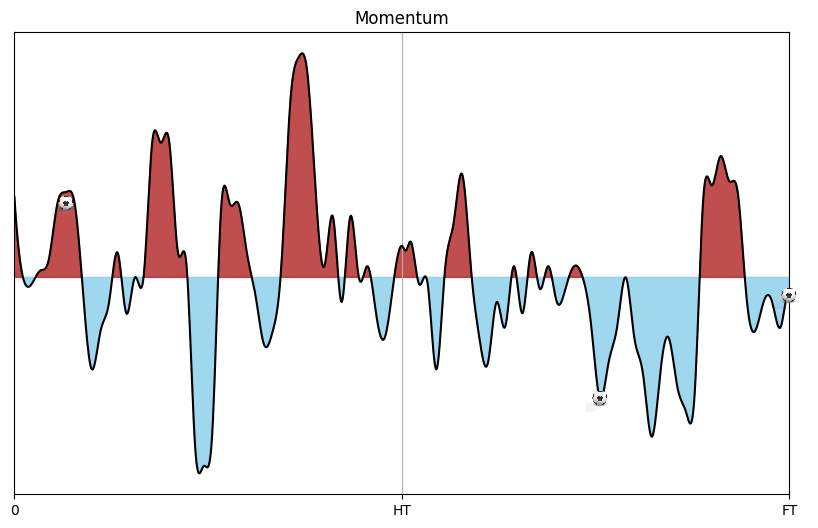

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from main_data import main_content, data


momentum_data = main_content['matchFacts']['momentum']['main']['data']

home_team_goals_data = data['props']['pageProps']['header']['events']['homeTeamGoals']
away_team_goals_data = data['props']['pageProps']['header']['events']['awayTeamGoals']

goals_minutes = []

# Read an image from a file into an array.
path = './ball_.png'
image = plt.imread(path)


# Set goal minute into array
for goal in home_team_goals_data.values():
    for el in goal:
        goals_minutes.append(el['time'])

for goal in away_team_goals_data.values():
    for el in goal:
        goals_minutes.append(el['time'])


print_momentum_data(momentum_data)